# ランダムに２万人のデータを作成

In [1]:
import random

# BMIを計算して体型を返す
def calc_bmi(h, w):
    bmi = w / (h/100) **2 
    if bmi < 18.5:
        return "thin"
    elif bmi < 25:
        return "normal"
    else:
        return "fat"
    
# 出力ファイルの準備
fp = open("bmi.csv", "w", encoding="utf-8")
fp.write("height,weight,label\r\n")

# ランダムなデータを作成
cnt = {"thin":0, "normal":0, "fat":0}
for i in range(20000):
    h = random.randint(120, 200)
    w = random.randint(35, 80)
    label = calc_bmi(h, w)
    cnt[label] += 1
    fp.write("{0},{1},{2}\r\n".format(h, w, label))
fp.close()
print("ok", cnt)

ok {'thin': 6433, 'normal': 5894, 'fat': 7673}


# SVMで学習

In [3]:
from sklearn import cross_validation, svm, metrics
import matplotlib.pyplot as plt
import pandas as pd

# 身長・体重データの読み込み
tbl = pd.read_csv("bmi.csv")

# カラムをスライスして正規化
label = tbl["label"]
w = tbl["weight"] / 100
h = tbl["height"] / 200
wh = pd.concat([w, h], axis=1)

# 学習用とテストデータに分ける
data_train, data_test, label_train, label_test = cross_validation.train_test_split(wh, label)

# データを学習
clf = svm.SVC()
clf.fit(data_train, label_train)

# データを予測
predict = clf.predict(data_test)

#　合っているか確認
ac_score = metrics.accuracy_score(label_test, predict)
cl_report = metrics.classification_report(label_test, predict)
print("正解率=", ac_score)
print("レポート=\n", cl_report)


正解率= 0.9864
レポート=
              precision    recall  f1-score   support

        fat       1.00      0.99      0.99      1901
     normal       0.96      1.00      0.98      1468
       thin       1.00      0.97      0.99      1631

avg / total       0.99      0.99      0.99      5000



# 描画

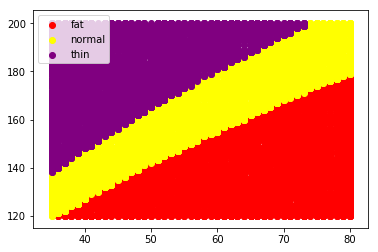

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# PandasでCSVファイルを読む
tbl = pd.read_csv("bmi.csv", index_col=2)

# 描画を開始する
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# サブプロット用-指定のラベルを任意の色で描画
def scatter(lbl, color):
    b = tbl.loc[lbl]
    ax.scatter(b["weight"],b["height"], c=color, label=lbl)
    
scatter("fat", "red")
scatter("normal", "yellow")
scatter("thin", "purple")

ax.legend()
plt.savefig("bmi-test.png")
plt.show()
